In [9]:
#importing libraries
from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Sbopen
from matplotlib.patches import Circle


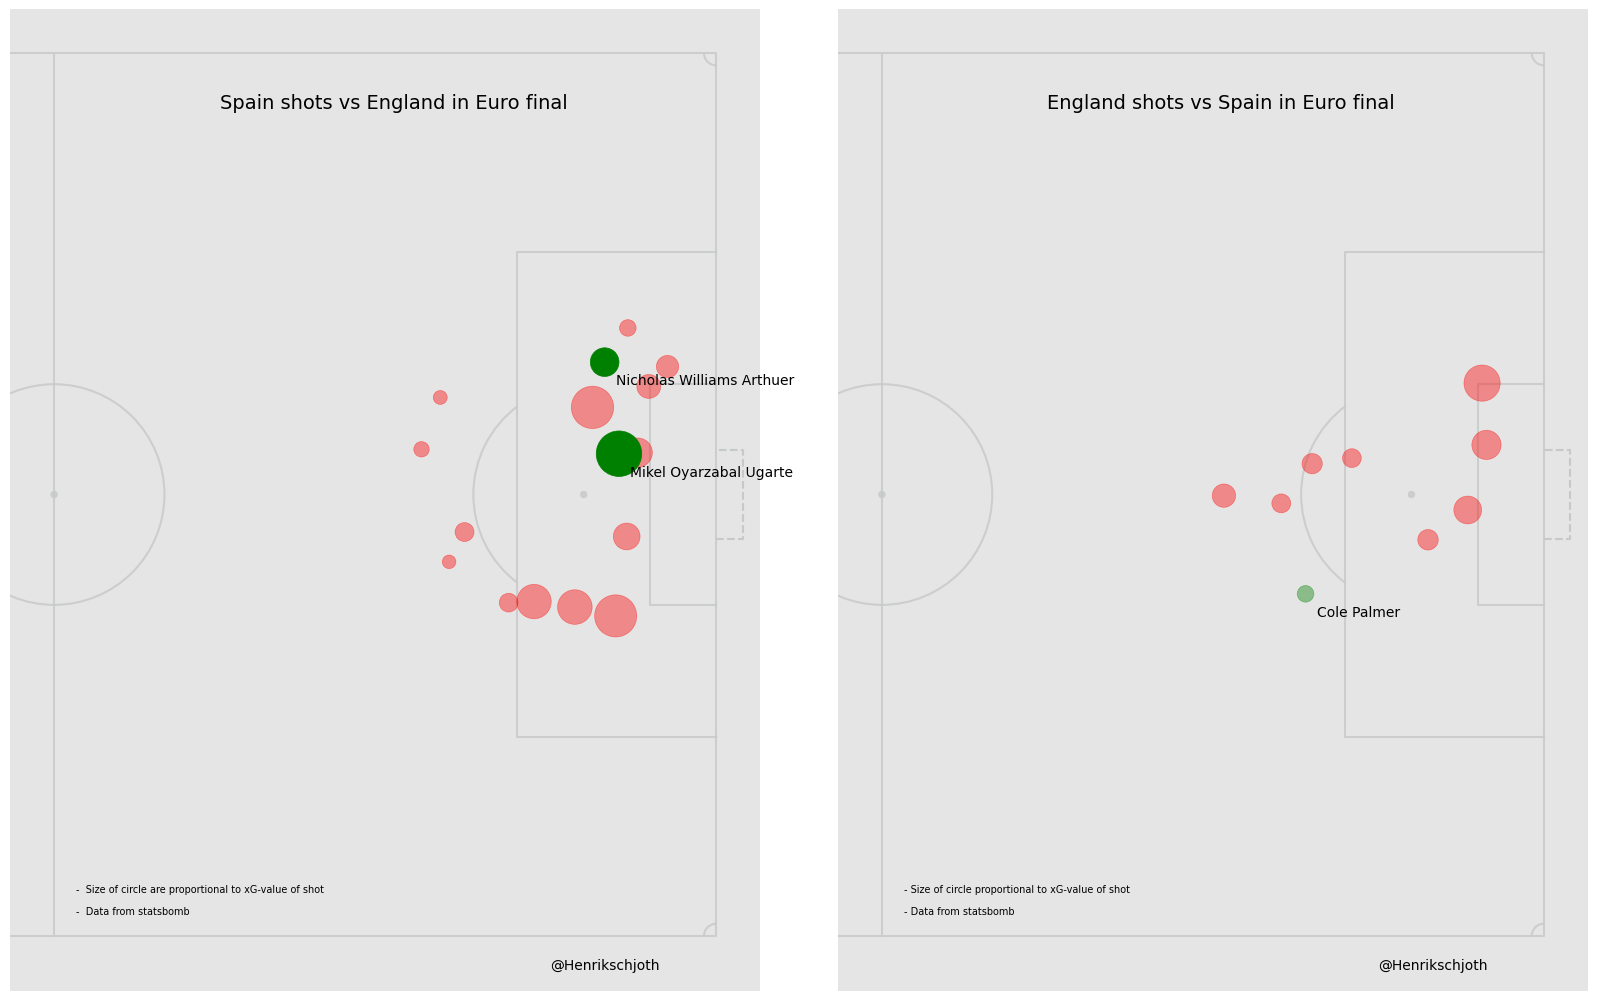

In [11]:
#Find competitition and event data
parser = Sbopen()
df_competition = parser.competition()
df_matches = parser.match(competition_id=55, season_id=282)
match_id=3943043
df_events, df_related, df_freeze, df_tactics = parser.event(3943043)
parser.event(3788741)
#get team names
team1, team2 = df_events.team_name.unique()
#A dataframe of shots
df_events.columns
shots=df_events[df_events['type_name']=='Shot']
shots=shots[['player_id', 'player_name','period', 'minute','end_x', 'end_y','team_name', 'body_part_id', 'body_part_name',
       'x', 'y', 'outcome_id', 'outcome_name','shot_statsbomb_xg', 'team_id',]]

plt.style.use('ggplot')
# Create a figure with two axis
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(16, 9))
fig.tight_layout(pad=-4.0)#decrease space between subplots

# Draw two pitches for both team
pitch1 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', half=True, pad_bottom=5,
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch2 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', half=True,pad_bottom=5, 
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )

pitch1.draw(ax=ax1)  # Tegner banen for team1
pitch2.draw(ax=ax2)  # Tegner banen for team2

# StatsBomb pitch dimensions
pitchWidthY = 80  # Assuming StatsBomb pitch dimensions
pitchLengthX = 120  # Assuming StatsBomb pitch dimensions

# Plot shots
for i, row in shots.iterrows():
    x = row['x']
    y = row['y']
    goal = row['outcome_name'] == 'Goal'
    circleSize = np.sqrt(float(row['shot_statsbomb_xg']) * 15)
    dx = row['end_x'] - row['x']
    dy = row['end_y'] - row['y']
    color='red'
    fontsize=10
    if row['team_name'] == team1:  # Checks if shots belongs to team1
        if goal: #Adjust circle color if goal and adds text
            circle = Circle((x, y), circleSize, color='green')
            ax1.text(x + 1, y + 2, row['player_name'], fontsize=fontsize, color='black')   
        else:
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)
        ax1.add_patch(circle)
    
    else:  # Shots belongs to team2
        if goal:
            circle = Circle((x, y), circleSize, color="green",alpha=alpha)
            ax2.text(x + 1, y + 2, row['player_name'], fontsize=fontsize, color='black')
        else:
            circle = Circle((x, y), circleSize,color=color, alpha=alpha)
        ax2.add_patch(circle)
    
# Add title to each axis
ax1.text(75, 5, team1  + ' shots vs ' +   team2  + ' in Euro final', fontsize=14, color='black')
ax2.text(75, 5, team2  + ' shots vs ' +   team1  + ' in Euro final', fontsize=14, color='black')

#Add text
fontsize=7 
color='black'
ax1.text(62, 76, '-  Size of circle are proportional to xG-value of shot', fontsize=fontsize, color=color)
ax1.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax1.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
ax2.text(62, 76, '- Size of circle proportional to xG-value of shot', fontsize=fontsize, color=color)
ax2.text(62, 78, '- Data from statsbomb', fontsize=fontsize, color=color)
ax2.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)


# Get position to each axis
ax1_position = ax1.get_position()
ax2_position = ax2.get_position()
#Saving the whole figure
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\shots_teams.jpg', dpi=600)

ax2.set_visible(False)  # Hiding axis2
# Adjusting axis 1 to cover whole figure
ax1.set_position([0, 0, 1, 1])
#Saving axis1 as one big image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\shots_team1.jpg', dpi=600)
ax1.set_position(ax1_position)  # Readjusting axis to starting posiiton
ax2.set_visible(True)   # Making ax2 visible again

ax1.set_visible(False)  # Hiding ax1
# Adjusting ax2 to cover whole figure
ax2.set_position([0, 0, 1, 1])
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\shots_team2.jpg', dpi=600)
ax2.set_position(ax2_position)  #  Readjusting axis to starting posiiton
ax1.set_visible(True)   # Showin axis1 again


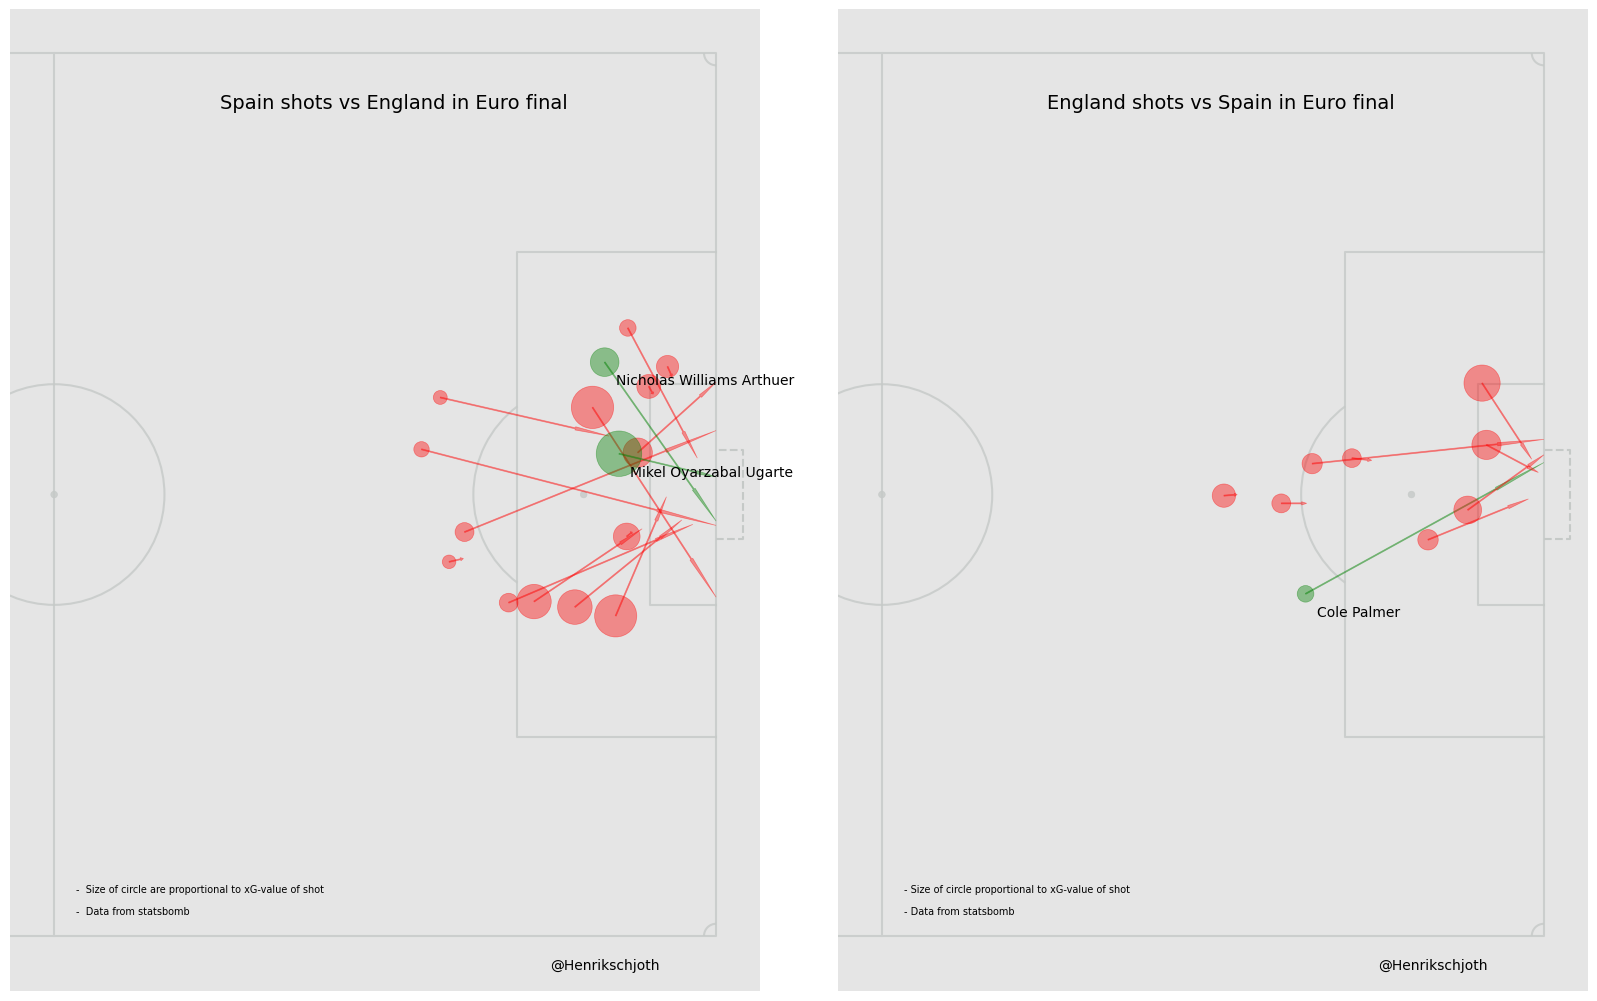

In [7]:
parser = Sbopen()
df_competition = parser.competition()
df_matches = parser.match(competition_id=55, season_id=282)
match_id=3943043
df_events, df_related, df_freeze, df_tactics = parser.event(3943043)
parser.event(3788741)
#get team names
team1, team2 = df_events.team_name.unique()
df_events.columns
#A dataframe of shots
shots=df_events[df_events['type_name']=='Shot']
shots=shots[['player_id', 'player_name','period', 'minute','end_x', 'end_y','team_name', 'body_part_id', 'body_part_name',
       'x', 'y', 'outcome_id', 'outcome_name','shot_statsbomb_xg', 'team_id',]]

plt.style.use('ggplot')
# Create a figure with two axis
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(16, 9))
fig.tight_layout(pad=-4.0)

# Fixing pitch specifics
pitch1 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', half=True, pad_bottom=5,
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch2 = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', half=True,pad_bottom=5, 
              spot_type='circle', spot_scale=0.0025, linewidth=1.5,linestyle='-', goal_type='box', goal_alpha=1,corner_arcs=True,line_alpha=0.8, goal_linestyle='--' )
pitch1.draw(ax=ax1)  #Draw pitches
pitch2.draw(ax=ax2)  

# StatsBomb pitch dimensions
pitchWidthY = 80  
pitchLengthX = 120  
# Plot each shot
for i, row in shots.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    goal = row['outcome_name'] == 'Goal'
    circleSize = np.sqrt(float(row['shot_statsbomb_xg']) * 15)
    dx = row['end_x'] - row['x']
    dy = row['end_y'] - row['y']
    color='red'
    fontsize=10
    alpha=0.4
    if row['team_name'] == team1:  # Checks if shots belong to team1
        if goal:
            ax1.text(x + 1, y + 2, row['player_name'], fontsize=fontsize, color='black')   
            color='green'
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
        else:
            circle = Circle((x, y), circleSize, color=color,alpha=alpha)
        shotArrow = plt.Arrow(x, y, dx, dy, width=0.5, color=color,alpha=alpha)    
        ax1.add_patch(circle)
        ax1.add_patch(shotArrow)
    else: 
        if goal:
            ax2.text(x + 1, y + 2, row['player_name'], fontsize=fontsize, color='black')
            color='green'
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)   
        else:
            circle = Circle((x, y), circleSize, color=color, alpha=alpha)
        shotArrow = plt.Arrow(x, y, dx, dy, width=0.5, color=color, alpha=alpha)
        ax2.add_patch(circle)
        ax2.add_patch(shotArrow)
    
# Add title
ax1.text(75, 5, team1  + ' shots vs ' +   team2  + ' in Euro final', fontsize=14, color='black')
ax2.text(75, 5, team2  + ' shots vs ' +   team1  + ' in Euro final', fontsize=14, color='black')

fontsize=7 
color='black'
ax1.text(62, 76, '-  Size of circle are proportional to xG-value of shot', fontsize=fontsize, color=color)
ax1.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax1.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)
ax2.text(62, 76, '- Size of circle proportional to xG-value of shot', fontsize=fontsize, color=color)
ax2.text(62, 78, '- Data from statsbomb', fontsize=fontsize, color=color)
ax2.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)

#Saving images, together and separetely
# Get position for ax1 and ax2
ax1_position = ax1.get_position()
ax2_position = ax2.get_position()
#Saving both axis in one image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\shots_teams.jpg', dpi=600)

ax2.set_visible(False)  # Hiding axis2
# Adjusting ax1 to cover whole figure
ax1.set_position([0, 0, 1, 1])
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\shots_team1.jpg', dpi=600)
ax1.set_position(ax1_position)  # Readjust axis back to original position
ax2.set_visible(True)   # Show axis 2 again

ax1.set_visible(False)  #hiding axis1
ax2.set_position([0, 0, 1, 1])
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\shots_team2.jpg', dpi=600)
ax2.set_position(ax2_position) 
ax1.set_visible(True)   # Show ax1 again
